In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import math
import yfinance as yf
from pandas_datareader.data import DataReader
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use("fivethirtyeight")
from datetime import datetime
from dateutil.relativedelta import relativedelta
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from numpy import sqrt

# Extraer datos de los ultimos 3 anios

In [ ]:
empresas = ['AAPL', 'GOOG', 'MSFT', 'AMZN','META','NFLX']
nombreEmpresas = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META","NETFLIX"]
end = datetime.now()
start=end - relativedelta(years=3)
stonks=[]
i=0
for empresa in empresas:
    df=yf.download(empresa, start, end)
    df['company_name']=nombreEmpresas[i]
    stonks.append(df)
    i+=1


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
stonks[1].shape

(757, 7)

In [ ]:
df = pd.concat(stonks)
df.head()

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2019-07-09,49.799999,50.377499,49.702499,50.310001,49.103367,82312000,APPLE
2019-07-10,50.462502,50.932499,50.389999,50.807499,49.588932,71588400,APPLE
2019-07-11,50.827499,51.097500,50.427502,50.437500,49.227810,80767200,APPLE
2019-07-12,50.612499,51.000000,50.549999,50.825001,49.606014,70380800,APPLE
2019-07-15,51.022499,51.467499,51.000000,51.302502,50.072067,67789600,APPLE


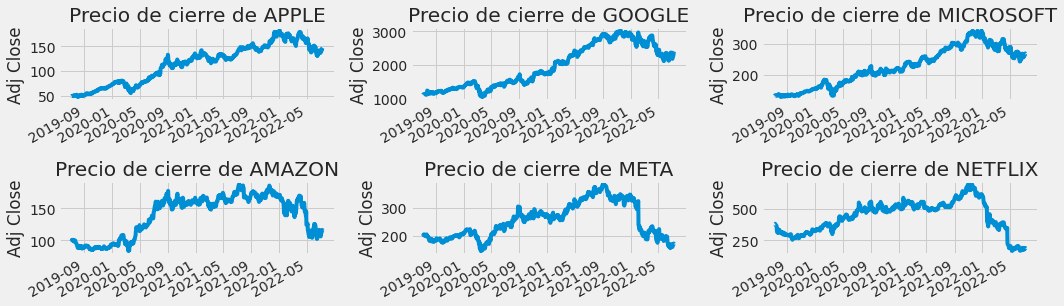

In [ ]:

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)
for i, company in enumerate(stonks, 1):
  plt.subplot(3, 3, i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"Precio de cierre de {nombreEmpresas[i - 1]}")
  
plt.tight_layout()  

# Correlacion entre empresas

In [ ]:
dfCierre = yf.download(empresas, start, end)['Adj Close']
dfCierre.head() 

[*********************100%***********************]  6 of 6 completed


,AAPL,AMZN,GOOG,META,MSFT,NFLX
Date,,,,,,
2019-07-09,49.103363,99.415001,1124.829956,199.210007,132.427216,379.929993
2019-07-10,49.588936,100.870499,1140.479980,202.729996,133.776108,381.000000
2019-07-11,49.227806,100.053497,1144.209961,201.229996,134.309845,379.500000
2019-07-12,49.606010,100.550003,1144.900024,204.869995,134.795074,373.250000
2019-07-15,50.072071,101.049500,1150.339966,203.910004,134.795074,366.600006


In [ ]:
dfCierre.shape

(757, 6)

In [ ]:
tech_rets = dfCierre.pct_change()
tech_rets.head()

,AAPL,AMZN,GOOG,META,MSFT,NFLX
Date,,,,,,
2019-07-09,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-10,0.009889,0.014641,0.013913,0.017670,0.010186,0.002816
2019-07-11,-0.007282,-0.008100,0.003271,-0.007399,0.003990,-0.003937
2019-07-12,0.007683,0.004962,0.000603,0.018089,0.003613,-0.016469
2019-07-15,0.009395,0.004968,0.004751,-0.004686,0.000000,-0.017816


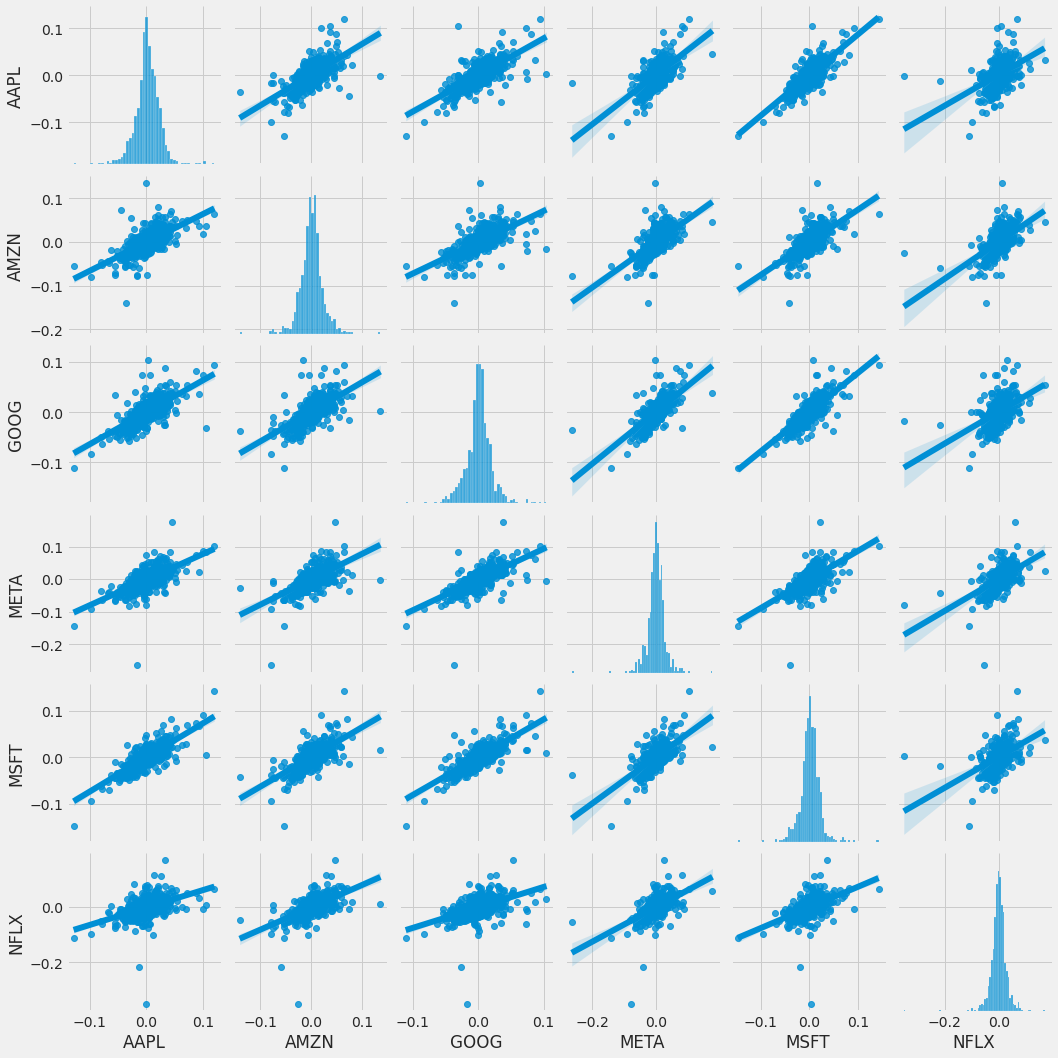

In [ ]:
sns.pairplot(tech_rets, kind='reg')

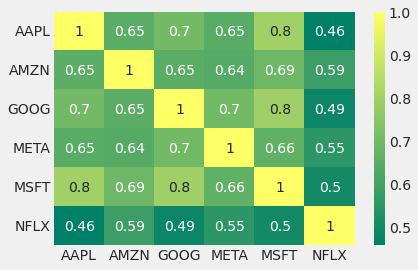

In [ ]:
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

# Preprocesamiento


In [ ]:
def crearDatos(dataset,numDias=1):
  X=[]
  Y=[]
  for i in range(len(dataset)-numDias):
    a=dataset[i:(i+numDias),0]
    X.append(a)
    Y.append(dataset[i+numDias,0])
  return np.array(X),np.array(Y)

In [ ]:
x_train=[]
y_train=[]
x_test=[]
y_test=[]

Scalers=[]
for i in range(len(stonks)):
  RawData=stonks[i]['Adj Close'].values
  tamEntrenamiento=int(len(RawData)*0.8)

  scaler = StandardScaler()
  scaler.fit(RawData.reshape(-1,1))
  Scalers.append(scaler)


  RawData = scaler.transform(RawData.reshape(-1,1))

  train=RawData[0:tamEntrenamiento]
  test=RawData[tamEntrenamiento:]

  print(f"Tam entrenamiento {len(train)}")
  print(f"Tam pruebas {len(test)}")
  
  numDias=7
  xTrain,yTrain=crearDatos(train,numDias)
  xTest,yTest=crearDatos(test,numDias)

  print(xTrain.shape)
  print(yTrain.shape)

  print(xTest.shape)
  print(yTest.shape)

  x_train.append(xTrain)
  y_train.append(yTrain)
  x_test.append(xTest)
  y_test.append(yTest)
  print("-"*10)



print(x_train[0][0])
print(y_train[0][0])

Tam entrenamiento 605
Tam pruebas 152
(598, 7)
(598,)
(145, 7)
(145,)
----------
Tam entrenamiento 605
Tam pruebas 152
(598, 7)
(598,)
(145, 7)
(145,)
----------
Tam entrenamiento 605
Tam pruebas 152
(598, 7)
(598,)
(145, 7)
(145,)
----------
Tam entrenamiento 605
Tam pruebas 152
(598, 7)
(598,)
(145, 7)
(145,)
----------
Tam entrenamiento 605
Tam pruebas 152
(598, 7)
(598,)
(145, 7)
(145,)
----------
Tam entrenamiento 605
Tam pruebas 152
(598, 7)
(598,)
(145, 7)
(145,)
----------
[-1.69523322 -1.68266324 -1.69201173 -1.68222102 -1.67015616 -1.67464099
 -1.68190521]
-1.667313669663756


# Modelo

In [ ]:
def visModel(nombre,data,predictions):
  train = data[-1*(len(predictions)+30):]
  validation = data[-1*(len(predictions)):]
  validation['Predictions'] = predictions[:,0]


  plt.figure(figsize=(16,8))
  plt.title(f"{nombre}")
  plt.xlabel('Fechas')
  plt.ylabel('Precio Cierre($)')
  plt.plot(train)
  plt.plot(validation[['Adj Close', 'Predictions']])
  plt.legend(['Entrenamiento', 'Validación', 'Predicción'], loc='upper right')
  plt.savefig(f"/content/drive/MyDrive/Colab Notebooks/TopicosIa2022/ResultadosFinal/{nombre}.png")
  plt.show()

In [ ]:
def crearModeloLSTM(xShape,lstm1,lstm2,lstm3):
  model = Sequential()
  model.add(layers.LSTM(lstm1, return_sequences=True,input_shape=(xShape, 1)))
  model.add(layers.LSTM(lstm2, return_sequences=True))
  model.add(layers.LSTM(lstm3, return_sequences=False))
  model.add(layers.Dense(1))
  model.compile(optimizer='adam',
                loss='mean_squared_error',
                metrics=['mse', 'mae',tf.keras.metrics.RootMeanSquaredError()])
  return model

Epoch 1/100
19/19 [==============================] - 6s 15ms/step - loss: 0.4048 - mse: 0.4048 - mae: 0.5232 - root_mean_squared_error: 0.6363
Epoch 2/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0476 - mse: 0.0476 - mae: 0.1692 - root_mean_squared_error: 0.2181
Epoch 3/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0252 - mse: 0.0252 - mae: 0.1287 - root_mean_squared_error: 0.1588
Epoch 4/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0184 - mse: 0.0184 - mae: 0.1087 - root_mean_squared_error: 0.1355
Epoch 5/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0155 - mse: 0.0155 - mae: 0.0978 - root_mean_squared_error: 0.1246
Epoch 6/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0131 - mse: 0.0131 - mae: 0.0886 - root_mean_squared_error: 0.1144
Epoch 7/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0114 - mse: 0.0114 - mae: 0.0813 - root_mean_squared_error: 0.1067

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


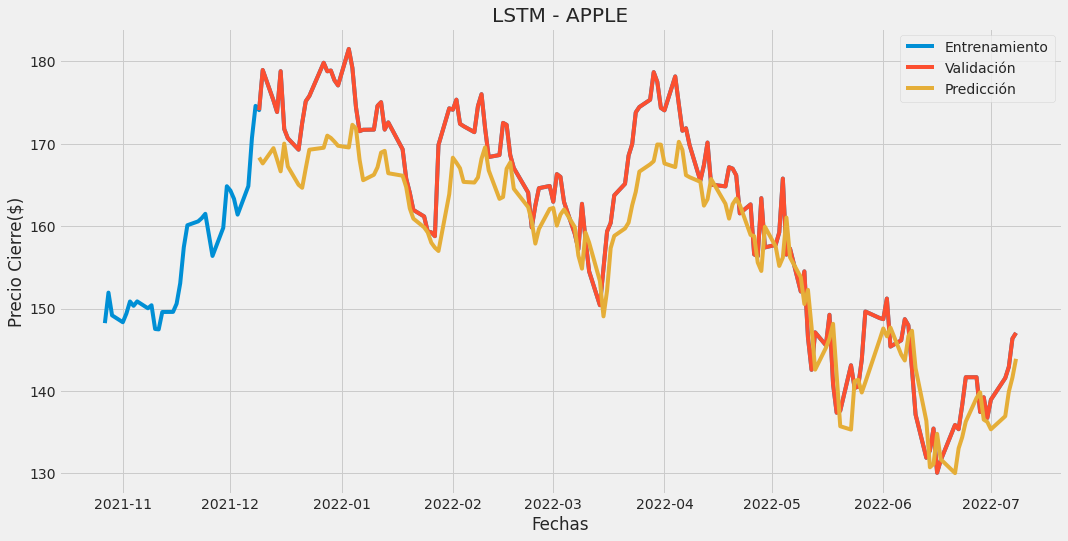

Epoch 1/100
19/19 [==============================] - 5s 15ms/step - loss: 0.4388 - mse: 0.4388 - mae: 0.5390 - root_mean_squared_error: 0.6625
Epoch 2/100
19/19 [==============================] - 0s 16ms/step - loss: 0.0369 - mse: 0.0369 - mae: 0.1548 - root_mean_squared_error: 0.1920
Epoch 3/100
19/19 [==============================] - 0s 13ms/step - loss: 0.0186 - mse: 0.0186 - mae: 0.1087 - root_mean_squared_error: 0.1362
Epoch 4/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0146 - mse: 0.0146 - mae: 0.0963 - root_mean_squared_error: 0.1210
Epoch 5/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0118 - mse: 0.0118 - mae: 0.0835 - root_mean_squared_error: 0.1085
Epoch 6/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0100 - mse: 0.0100 - mae: 0.0764 - root_mean_squared_error: 0.1000
Epoch 7/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0089 - mse: 0.0089 - mae: 0.0715 - root_mean_squared_error: 0.0945

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


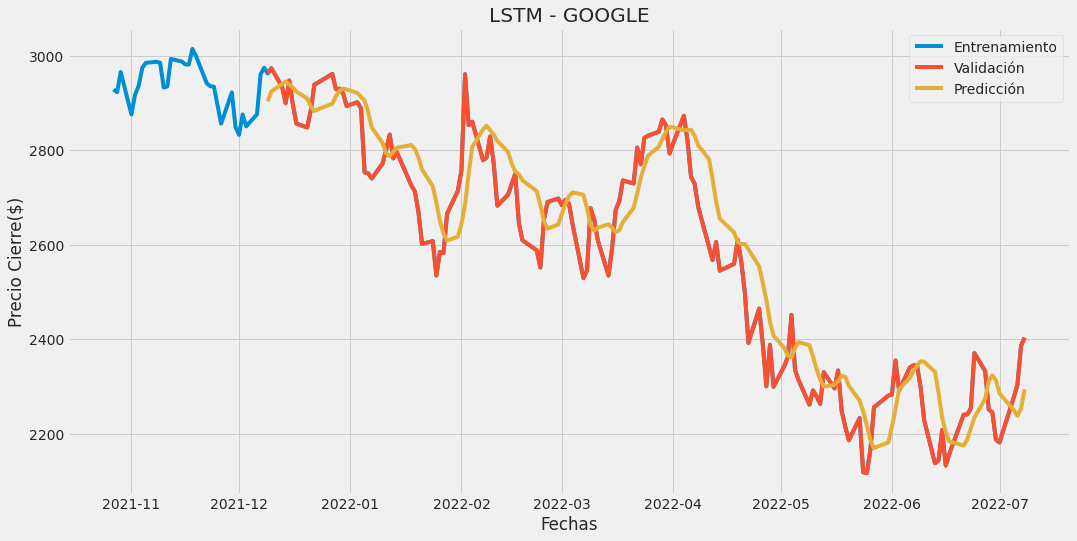

Epoch 1/100
19/19 [==============================] - 5s 14ms/step - loss: 0.4453 - mse: 0.4453 - mae: 0.5189 - root_mean_squared_error: 0.6673
Epoch 2/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0518 - mse: 0.0518 - mae: 0.1826 - root_mean_squared_error: 0.2275
Epoch 3/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0248 - mse: 0.0248 - mae: 0.1253 - root_mean_squared_error: 0.1574
Epoch 4/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0188 - mse: 0.0188 - mae: 0.1075 - root_mean_squared_error: 0.1370
Epoch 5/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0147 - mse: 0.0147 - mae: 0.0942 - root_mean_squared_error: 0.1211
Epoch 6/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0128 - mse: 0.0128 - mae: 0.0879 - root_mean_squared_error: 0.1133
Epoch 7/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0118 - mse: 0.0118 - mae: 0.0828 - root_mean_squared_error: 0.1084

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


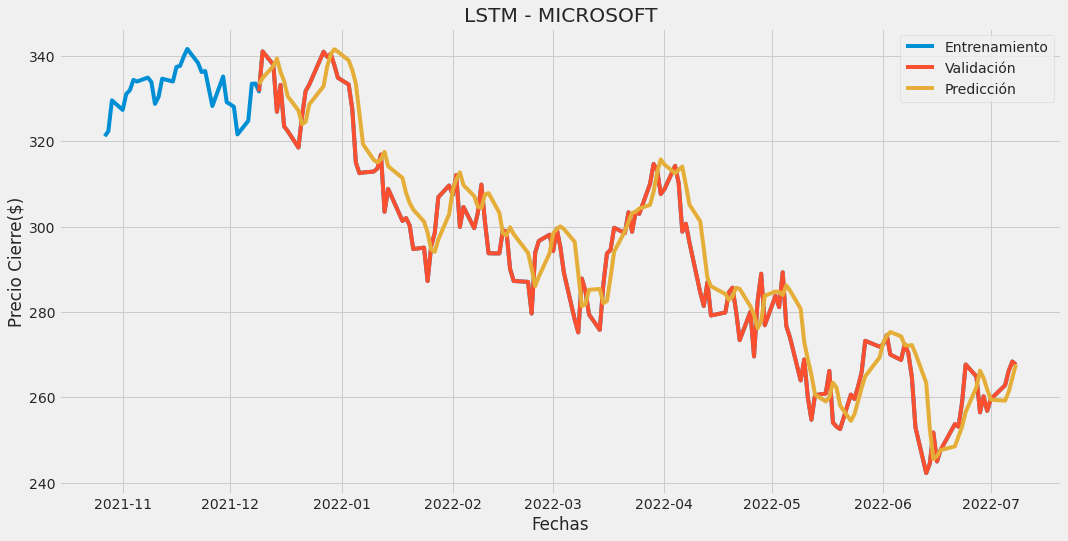

Epoch 1/100
19/19 [==============================] - 6s 15ms/step - loss: 0.4755 - mse: 0.4755 - mae: 0.5660 - root_mean_squared_error: 0.6895
Epoch 2/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0550 - mse: 0.0550 - mae: 0.1923 - root_mean_squared_error: 0.2346
Epoch 3/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0327 - mse: 0.0327 - mae: 0.1368 - root_mean_squared_error: 0.1807
Epoch 4/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0296 - mse: 0.0296 - mae: 0.1329 - root_mean_squared_error: 0.1720
Epoch 5/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0274 - mse: 0.0274 - mae: 0.1273 - root_mean_squared_error: 0.1657
Epoch 6/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0259 - mse: 0.0259 - mae: 0.1231 - root_mean_squared_error: 0.1609
Epoch 7/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0250 - mse: 0.0250 - mae: 0.1199 - root_mean_squared_error: 0.1580

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


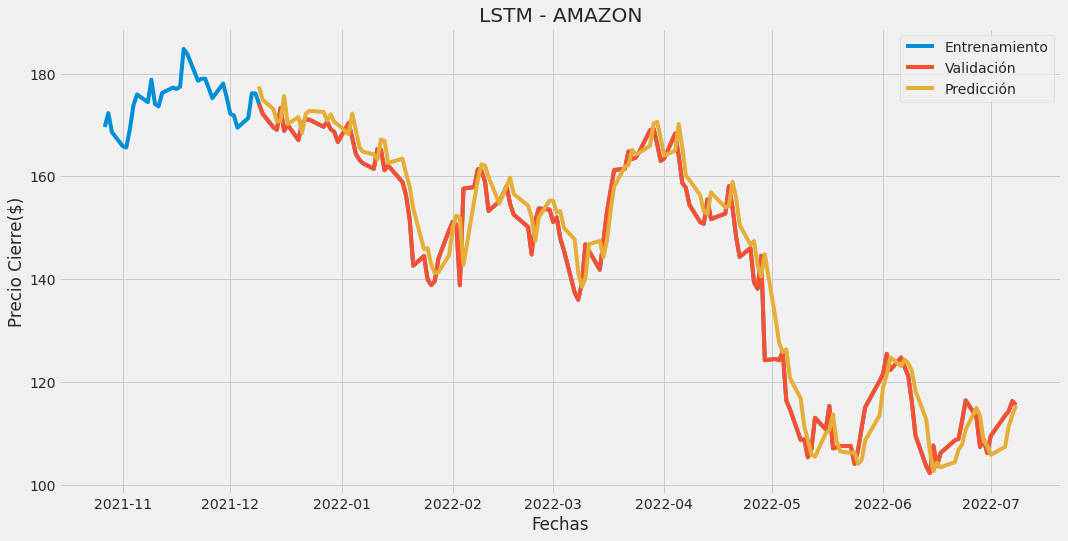

Epoch 1/100
19/19 [==============================] - 5s 14ms/step - loss: 0.4761 - mse: 0.4761 - mae: 0.5510 - root_mean_squared_error: 0.6900
Epoch 2/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0771 - mse: 0.0771 - mae: 0.2245 - root_mean_squared_error: 0.2777
Epoch 3/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0474 - mse: 0.0474 - mae: 0.1710 - root_mean_squared_error: 0.2177
Epoch 4/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0381 - mse: 0.0381 - mae: 0.1512 - root_mean_squared_error: 0.1952
Epoch 5/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0313 - mse: 0.0313 - mae: 0.1356 - root_mean_squared_error: 0.1770
Epoch 6/100
19/19 [==============================] - 0s 14ms/step - loss: 0.0277 - mse: 0.0277 - mae: 0.1267 - root_mean_squared_error: 0.1663
Epoch 7/100
19/19 [==============================] - 0s 16ms/step - loss: 0.0265 - mse: 0.0265 - mae: 0.1223 - root_mean_squared_error: 0.1629

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


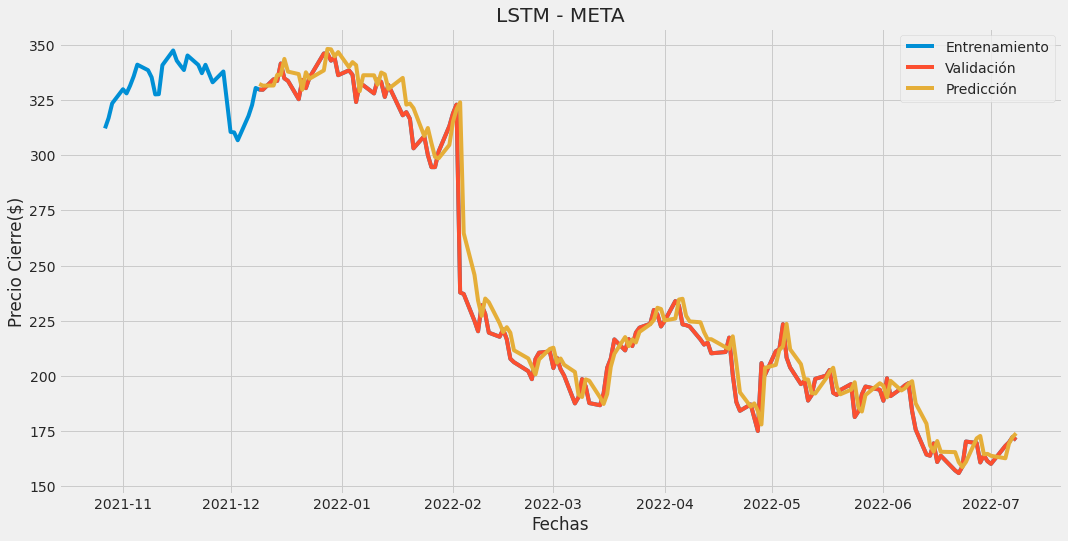

Epoch 1/100
19/19 [==============================] - 7s 16ms/step - loss: 0.3548 - mse: 0.3548 - mae: 0.4682 - root_mean_squared_error: 0.5956
Epoch 2/100
19/19 [==============================] - 0s 16ms/step - loss: 0.0544 - mse: 0.0544 - mae: 0.1831 - root_mean_squared_error: 0.2333
Epoch 3/100
19/19 [==============================] - 0s 19ms/step - loss: 0.0355 - mse: 0.0355 - mae: 0.1478 - root_mean_squared_error: 0.1883
Epoch 4/100
19/19 [==============================] - 0s 17ms/step - loss: 0.0325 - mse: 0.0325 - mae: 0.1391 - root_mean_squared_error: 0.1802
Epoch 5/100
19/19 [==============================] - 0s 16ms/step - loss: 0.0309 - mse: 0.0309 - mae: 0.1346 - root_mean_squared_error: 0.1759
Epoch 6/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0280 - mse: 0.0280 - mae: 0.1281 - root_mean_squared_error: 0.1672
Epoch 7/100
19/19 [==============================] - 0s 15ms/step - loss: 0.0267 - mse: 0.0267 - mae: 0.1240 - root_mean_squared_error: 0.1635

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


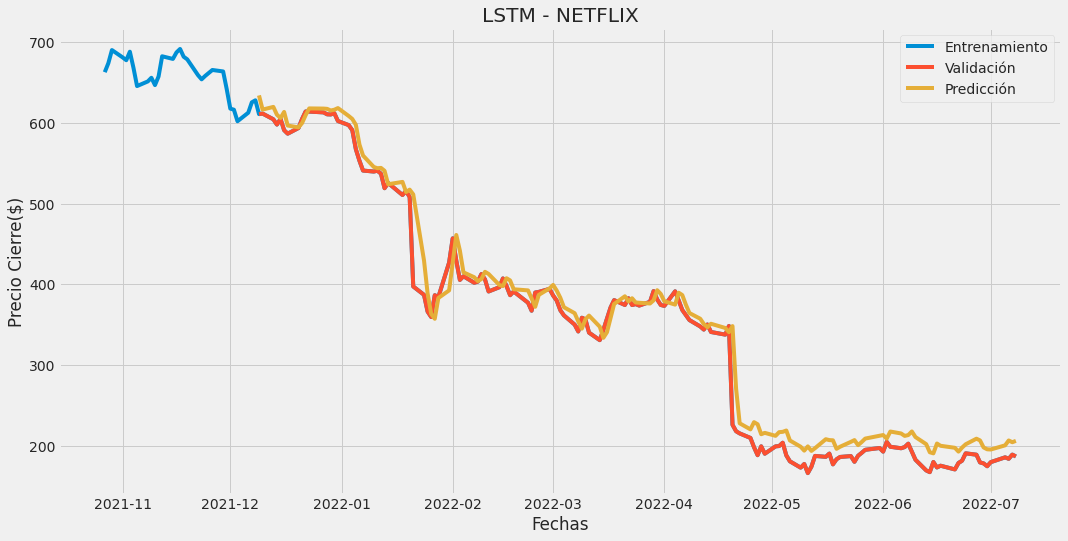

In [ ]:
lstmRMSE=[]
lstmMSE=[]
lstmMAE=[]
lstmR2=[]
for i in range(len(stonks)):
  xShape=x_train[i].shape[1]
  model=crearModeloLSTM(xShape,100,50,20)

  xTrain=np.reshape(x_train[i], (x_train[i].shape[0], x_train[i].shape[1], 1))
  xTest=np.reshape(x_test[i], (x_test[i].shape[0], x_test[i].shape[1], 1))

  history=model.fit(xTrain, y_train[i], epochs=100) 

  predictions = model.predict(xTest)

  #---------------------Metricas
  lstmRMSE.append(round( sqrt(mean_squared_error(y_test[i], predictions)),3))
  lstmMSE.append(round(mean_squared_error(y_test[i], predictions),3))
  lstmMAE.append(round(mean_absolute_error(y_test[i], predictions),3))
  lstmR2.append(round(r2_score(y_test[i], predictions),3))
  #---------------------VISUALIZACION

  predictions = Scalers[i].inverse_transform(predictions)
  visModel(f"LSTM - {nombreEmpresas[i]}",
           stonks[i].filter(['Adj Close']),
           predictions)

# Random Forest

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


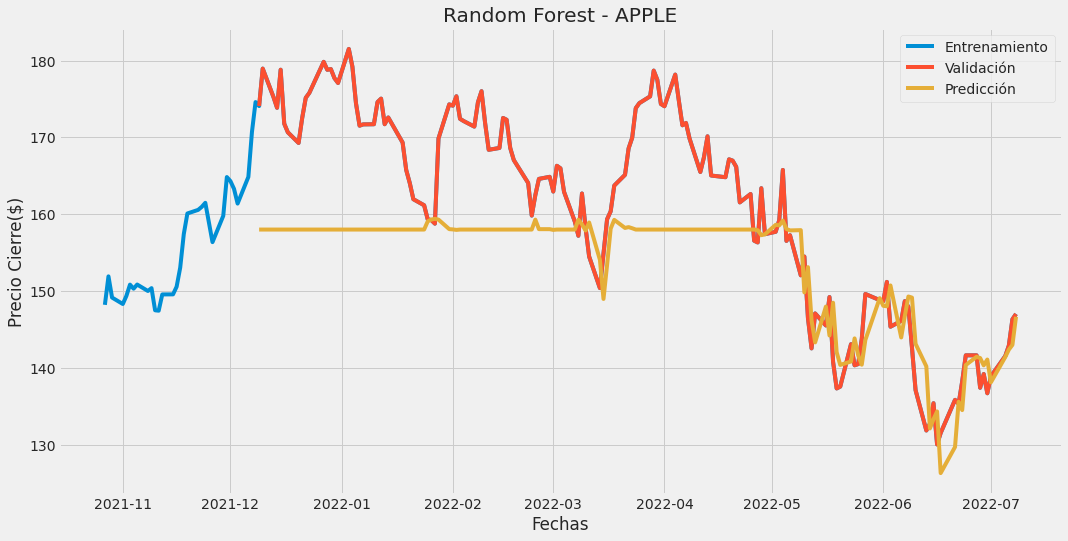

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


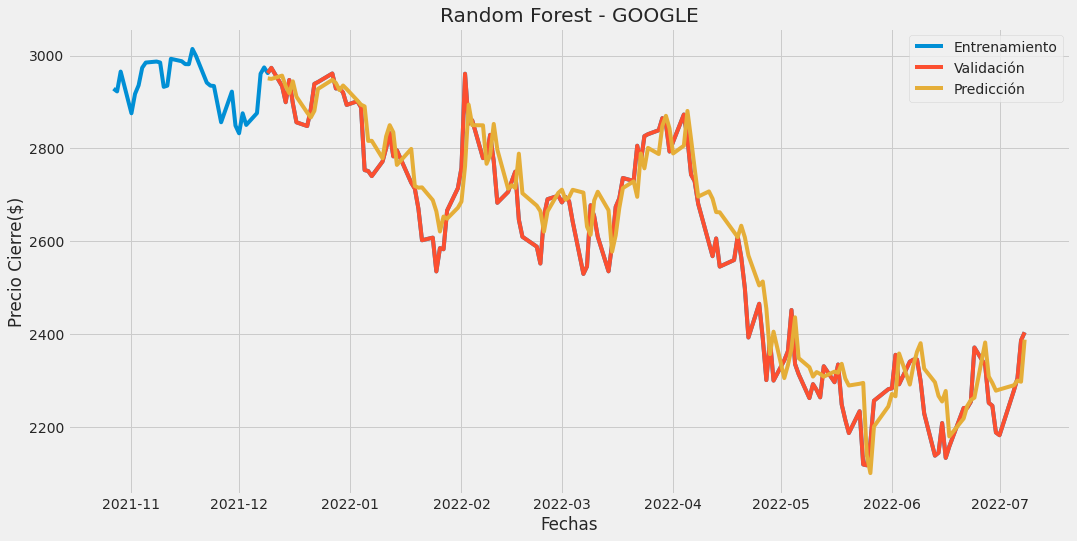

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


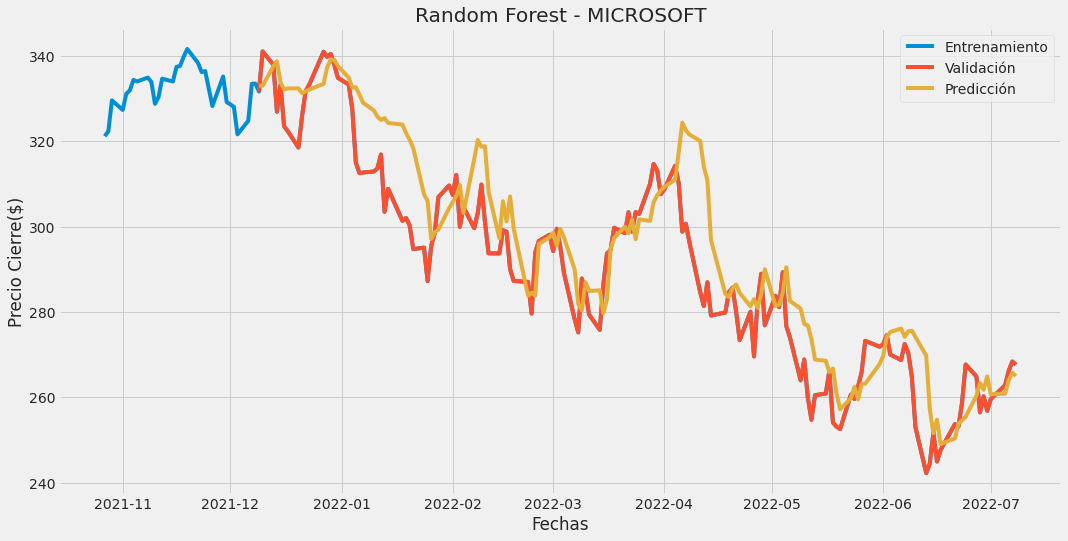

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


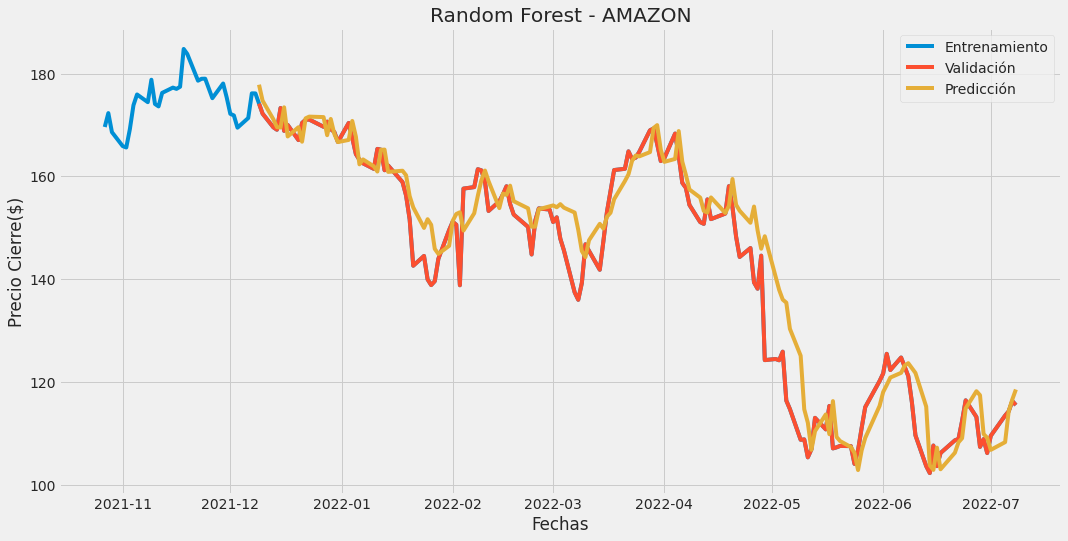

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


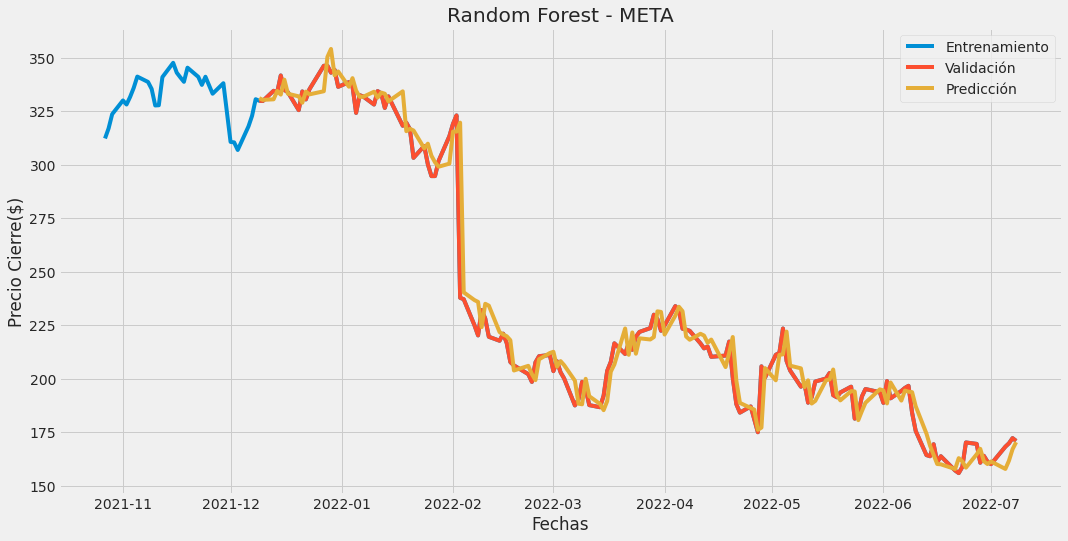

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


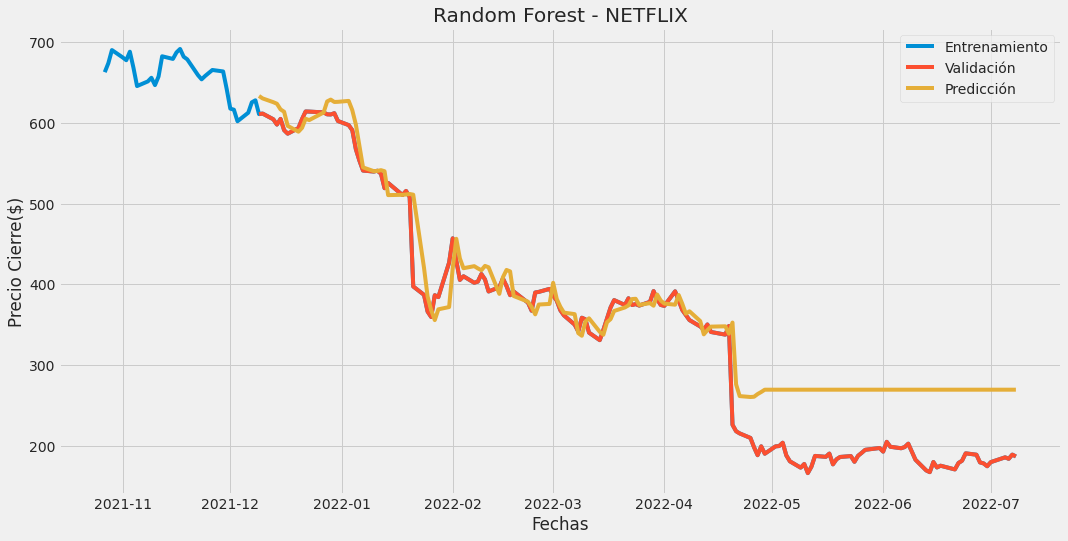

In [ ]:
rfRMSE=[]
rfMSE=[]
rfMAE=[]
rfR2=[]
for i in range(len(stonks)):
  regressor = RandomForestRegressor(n_estimators = 1000, max_depth = 10)
  regressor.fit(x_train[i], y_train[i])

  predictions=regressor.predict(x_test[i])
  predictions = predictions.reshape(-1,1)
  #---------------------Metricas
  rfRMSE.append(round(sqrt(mean_squared_error(y_test[i], predictions)),3))
  rfMSE.append(round(mean_squared_error(y_test[i], predictions),3))
  rfMAE.append(round(mean_absolute_error(y_test[i], predictions),3))
  rfR2.append(round(r2_score(y_test[i], predictions),3))
  #---------------------VISUALIZACION 
  predictions = Scalers[i].inverse_transform(predictions)
  visModel(f"Random Forest - {nombreEmpresas[i]}",
            stonks[i].filter(['Adj Close']),
            predictions)

# Resultados

##RMSE

In [ ]:
results1= pd.DataFrame(list(zip(lstmRMSE, rfRMSE)),columns =['LSTM', 'Random Forest'],index=nombreEmpresas)
results1.head(6)

,LSTM,Random Forest
APPLE,0.141,0.278
GOOGLE,0.140,0.115
MICROSOFT,0.125,0.180
AMAZON,0.153,0.195
META,0.176,0.163
NETFLIX,0.180,0.432


In [ ]:
results1.describe()

,LSTM,Random Forest
count,6.000000,6.000000
mean,0.152500,0.227167
std,0.021696,0.113577
min,0.125000,0.115000
25%,0.140250,0.167250
50%,0.147000,0.187500
75%,0.170250,0.257250
max,0.180000,0.432000


## MSE

In [ ]:
results2= pd.DataFrame(list(zip(lstmMSE, rfMSE)),columns =['LSTM', 'Random Forest'],index=nombreEmpresas)
results2.head(6)

,LSTM,Random Forest
APPLE,0.020,0.078
GOOGLE,0.020,0.013
MICROSOFT,0.016,0.032
AMAZON,0.024,0.038
META,0.031,0.027
NETFLIX,0.032,0.186


In [ ]:
results2.describe()

,LSTM,Random Forest
count,6.000000,6.000000
mean,0.023833,0.062333
std,0.006463,0.064395
min,0.016000,0.013000
25%,0.020000,0.028250
50%,0.022000,0.035000
75%,0.029250,0.068000
max,0.032000,0.186000


##MAE

In [ ]:
results3= pd.DataFrame(list(zip(lstmMAE, rfMAE)),columns =['LSTM', 'Random Forest'],index=nombreEmpresas)
results3.head(6)

,LSTM,Random Forest
APPLE,0.119,0.222
GOOGLE,0.114,0.091
MICROSOFT,0.101,0.133
AMAZON,0.121,0.140
META,0.110,0.105
NETFLIX,0.131,0.321


In [ ]:
results3.describe()

,LSTM,Random Forest
count,6.000000,6.000000
mean,0.116000,0.168667
std,0.010237,0.087441
min,0.101000,0.091000
25%,0.111000,0.112000
50%,0.116500,0.136500
75%,0.120500,0.201500
max,0.131000,0.321000


## R2

In [ ]:
results4= pd.DataFrame(list(zip(lstmR2, rfR2)),columns =['LSTM', 'Random Forest'],index=nombreEmpresas)
results4.head(6)

,LSTM,Random Forest
APPLE,0.840,0.380
GOOGLE,0.880,0.919
MICROSOFT,0.901,0.796
AMAZON,0.953,0.924
META,0.967,0.971
NETFLIX,0.976,0.863


In [ ]:
results4.describe()

,LSTM,Random Forest
count,6.000000,6.000000
mean,0.919500,0.808833
std,0.054394,0.218492
min,0.840000,0.380000
25%,0.885250,0.812750
50%,0.927000,0.891000
75%,0.963500,0.922750
max,0.976000,0.971000
